<a href="https://colab.research.google.com/github/smartleizi/data_analysis/blob/master/05%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E4%BE%8B1_%E7%9A%AE%E9%A9%AC%E4%BA%BA%E7%B3%96%E5%B0%BF%E7%97%85%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1问题定义
业务理解-需求分析

# 2获取数据和预处理

## 获取数据
1. 获取数据
* 模拟数据，数据生成；真实数据，外部获取

2. 熟悉数据-统计特征

3. 熟悉数据-数据可视化

4. 处理数据-数据清洗


*   缺失，重复，异常   



5. 模型训练前数据预处理


In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 获取数据
url = "https://raw.githubusercontent.com/smartleizi/data_analysis/master/data/pima_indians_diabetes.csv"
names = ['Preg', 'Glucose','BloodP', 'Skin', 'Insulin', 'BMI', 'DiabetesPed', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

data.head(5) #  data.tail(5)


,Preg,Glucose,BloodP,Skin,Insulin,BMI,DiabetesPed,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 熟悉数据-统计特征

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   preg         768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BloodP       768 non-null    int64  
 3   Skin         768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DiabetesPed  768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# 使用描述性统计了解数据
# 数据维度大小，768行，9列；数据类型dtypes: float64(2), int64(7);
# 无缺失值
# Pregnancies：怀孕次数 
# Glucose：葡萄糖 
# BloodPressure：血压 (mm Hg) 
# SkinThickness：皮层厚度 (mm) 
# Insulin：胰岛素 2小时血清胰岛素（mu U / ml 
# BMI：体重指数 （体重/身高^2） 
# DiabetesPedigreeFunction：糖尿病谱系功能 
# Age：年龄 （岁） 
# Outcome：类别，是否得病 （0或1）

# head()函数查看前几行了解你的数据。
# shape属性查看数据的维度。
# dtypes属性查看每个属性的数据类型。
# describe()函数查看数据的分布。
# info()
# corr()函数计算变量之间的成对相关性

In [10]:
data.describe()
# df.describe(include='all')

,preg,Glucose,BloodP,Skin,Insulin,BMI,DiabetesPed,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 熟悉数据-数据可视化
可视化了解数据

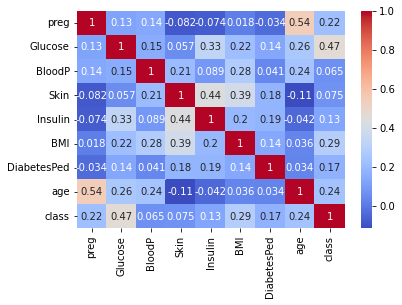

In [14]:
# 分析数据间的相关性,使用皮尔森计算特征相关矩阵
corr = data.corr(method='pearson') 
# 热力图绘制相关性矩阵
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

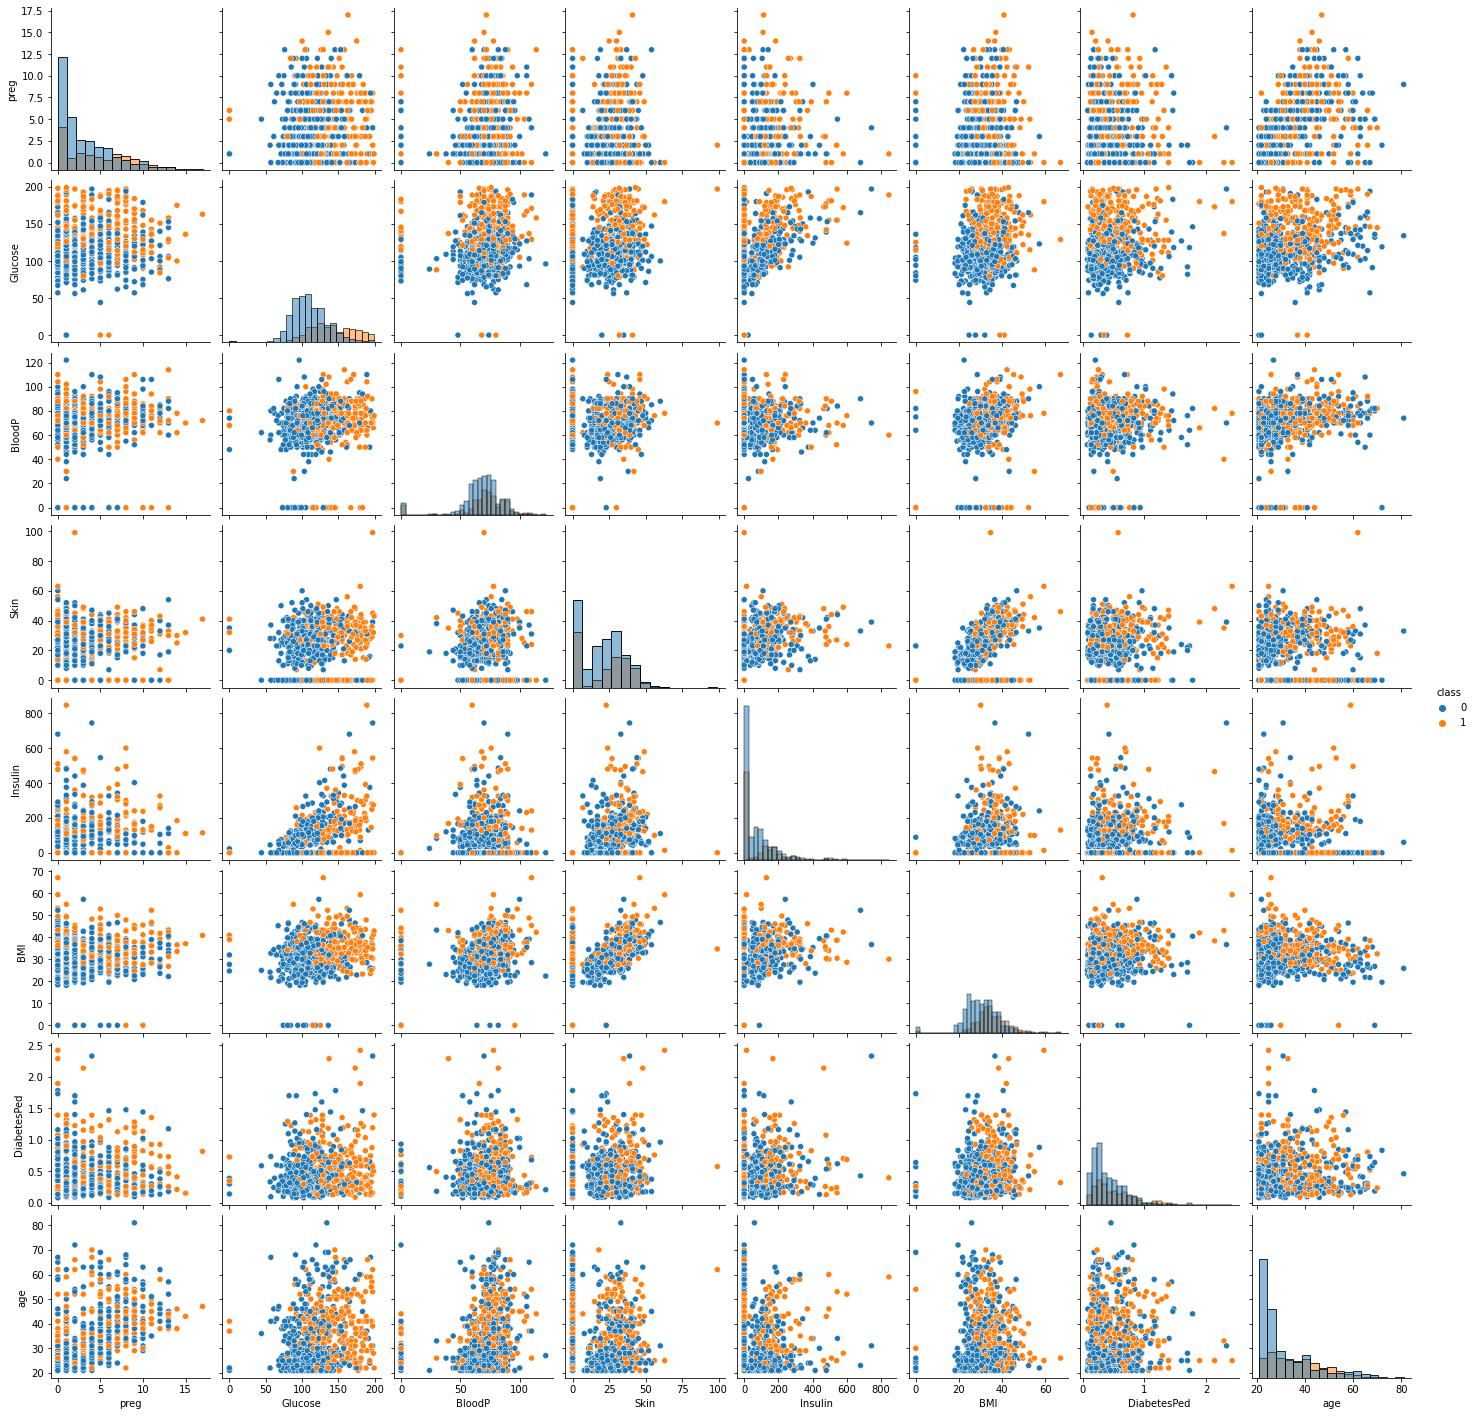

In [11]:
sns.pairplot(data=data, diag_kind='hist', hue= 'class')
plt.show()

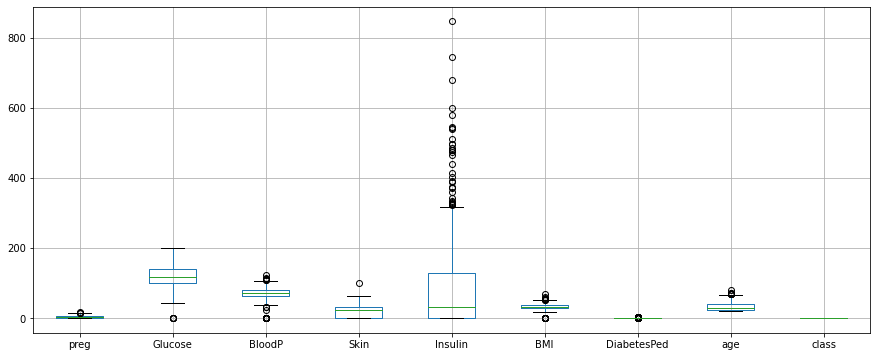

In [12]:
# 箱线图可以了解数据的异常值和分布的离散程度
data.boxplot(figsize=(15,6))

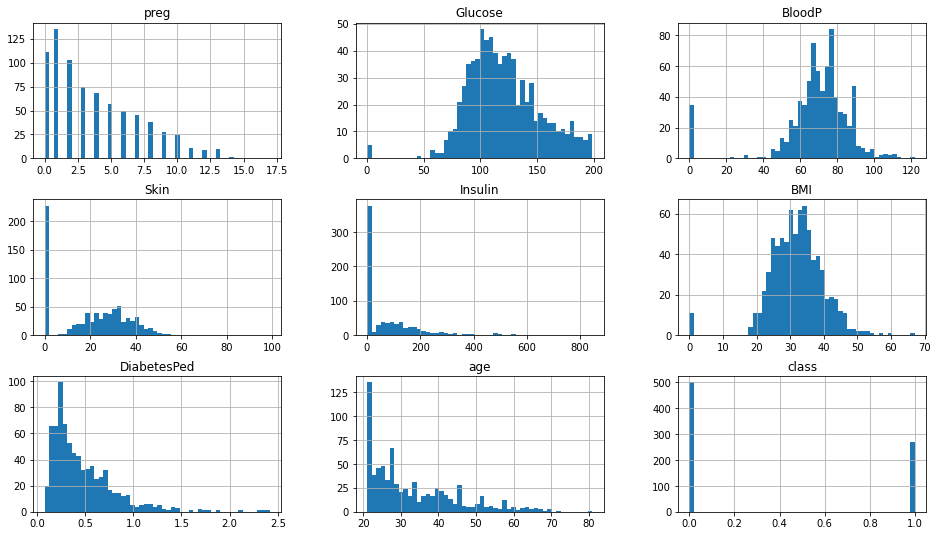

In [13]:
# 直方图可以了解数据分布情况
data.hist(bins=50, figsize=(16, 9))
plt.show()

## 处理数据-数据清洗



## 模型训练前数据处理

In [15]:
from sklearn.preprocessing import StandardScaler
data = data.values
X = data[:,0:8]
y = data[:,8]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


# 3模型搭建和训练

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10,   random_state=None, shuffle=False)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7668660287081339


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

models = []
models.append(("LR", LogisticRegression())) #逻辑回归
models.append(("NB", GaussianNB())) # 高斯朴素贝叶斯
models.append(("KNN", KNeighborsClassifier(10))) #K近邻分类
models.append(("DT", DecisionTreeClassifier())) #决策树分类
models.append(("SVM", SVC())) # 支持向量机分类
models.append(("adboost", AdaBoostClassifier())) # adboost


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10,   random_state=None, shuffle=False)
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring="accuracy")
    names.append(name)
    results.append(cv_result)
 
for i in range(len(names)):
    print(names[i], results[i].mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR 0.773427887901572
NB 0.7551777170198223
KNN 0.74865003417635
DT 0.6731032125768969
SVM 0.7604237867395763
adboost 0.7539473684210527


# 4模型评估和优化

# 5模型保存和应用

# 参考

1. [机器学习入门数据集--5.皮马人糖尿病预测数据集](https://cloud.tencent.com/developer/article/1397837)
2. [Python机器学习迷你课程](https://www.jiqixuexishequ.com/python-machine-learning-mini-course.html)